#  BAD DAY 2: Generalized linear models 

In [1]:
#for more examples see: http://plantecology.syr.edu/fridley/bio793/glm.html

setwd(getwd())


Generalized linear models (GLMs) extend the linear modeling capability of R to scenarios that involve non-normal error distributions or heteroscedasticity.  

All other classic assumptions (particularly independent observations) still apply.  The idea here is that linear functions of the predictor variables are obtained by a link function.  The data are then fit in this transformed scale (using an iterative routine based on least squares), but the expected variance is calculated on the original scale of the predictor variables.  

Simple examples of link functions are $log(y)$ [which linearizes $exp(x)$], $sqrt(y) [x^2]$, and $1/y$.  More particularly, GLMs work for the so-called 'exponential' family of error models: Poisson, binomial, Gamma, and normal.

## Count (or count-like) response variables

In [3]:
dat = read.csv('./Data/treedata.csv') #choose the treedata.csv dataset
head(dat)
dim(dat)
dat2 = subset(dat,dat$species=="Tsuga canadensis")



plotID,date,plotsize,spcode,species,cover,utme,utmn,elev,tci,streamdist,disturb,beers
ATBN-01-0403,08-28-2001,1000,ABIEFRA,Abies fraseri,1,275736,3942439,1660,5.701460,490.9,CORPLOG,0.22442864
ATBN-01-0532,07-24-2002,1000,ABIEFRA,Abies fraseri,8,302847,3942772,1712,3.823586,454.0,VIRGIN,0.83408785
ATBN-01-0533,07-24-2002,1000,ABIEFRA,Abies fraseri,3,303037,3943039,1722,3.893762,453.4,LT-SEL,1.33325863
ATBN-01-0536,07-25-2002,1000,ABIEFRA,Abies fraseri,3,273927,3935488,1754,3.145527,492.5,SETTLE,1.47124839
ATBP-01-0001,05-11-1999,10000,ABIEFRA,Abies fraseri,8,273857,3937870,1945,5.682065,492.4,VIRGIN,1.64377141
ATBP-01-0005,08-25-1999,10000,ABIEFRA,Abies fraseri,4,273876,3935462,1751,5.417182,545.9,SETTLE,0.00032873


[1] 8971   13

In [5]:
mean(dat2$cover)

[1] 4.659517

In [6]:
var(dat2$cover)

[1] 4.471835

In [7]:
table(dat2$cover)


  1   2   3   4   5   6   7   8   9  10 
 39  71 166 110  92  80 108  60  19   1 

If these counts were distributed exactly from a Poisson process, what would they look like, assuming the same mean (and variance)?



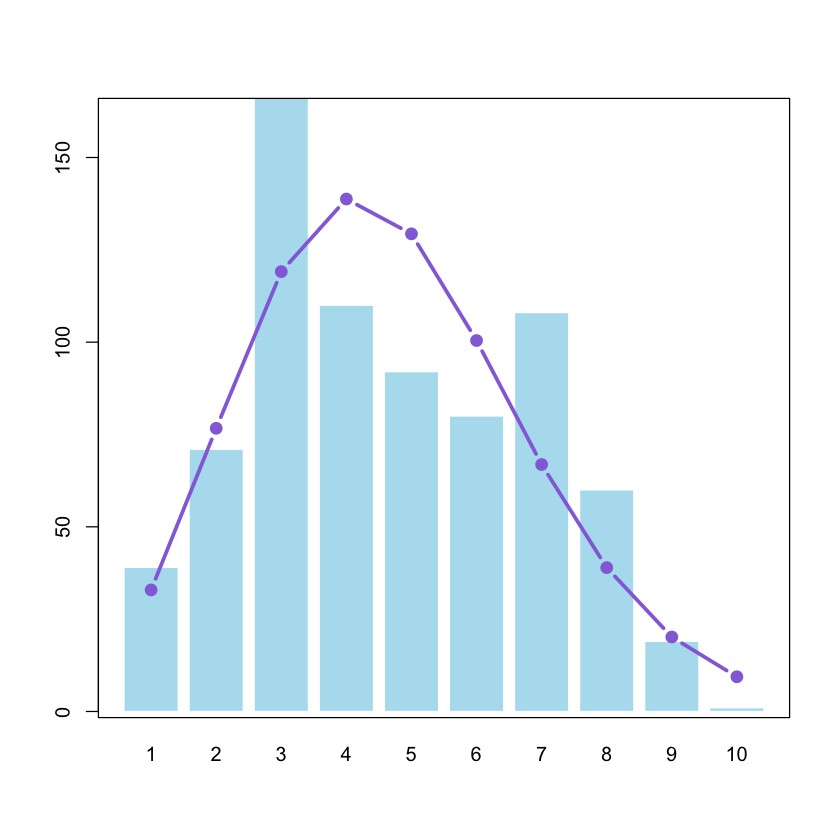

In [12]:
bar1 = barplot(as.vector(table(dat2$cover)),names.arg=seq(1:10), col = 'lightblue2',
              border = 'white')

points(bar1,dpois(seq(1,10),4.66)*sum(table(dat2$cover)),

     cex=1,type="b", col = 'mediumpurple', lwd = 3, pch = 19)
#?dpois

box()

In [13]:
#?glm

As you can see, the data look Poisson-ish but they're not perfect.  (One reason you've probably already guessed: our data are bounded at 10, so variance should actually go down for the highest values.)

Now let's fit a GLM to these data with just an intercept (overall mean):



In [14]:
glm1 = glm(cover~1,data=dat2,family=poisson)

summary(glm1) 


Call:
glm(formula = cover ~ 1, family = poisson, data = dat2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0594  -0.8229  -0.3132   1.0085   2.1430  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.53891    0.01696   90.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 749.25  on 745  degrees of freedom
Residual deviance: 749.25  on 745  degrees of freedom
AIC: 3212.2

Number of Fisher Scoring iterations: 4


Let's add a continuous predictor variable like elevation to generate a simple Poisson regression.  First we'll graph it:


And then we'll fit the new glm and test it against a model with only an intercept:



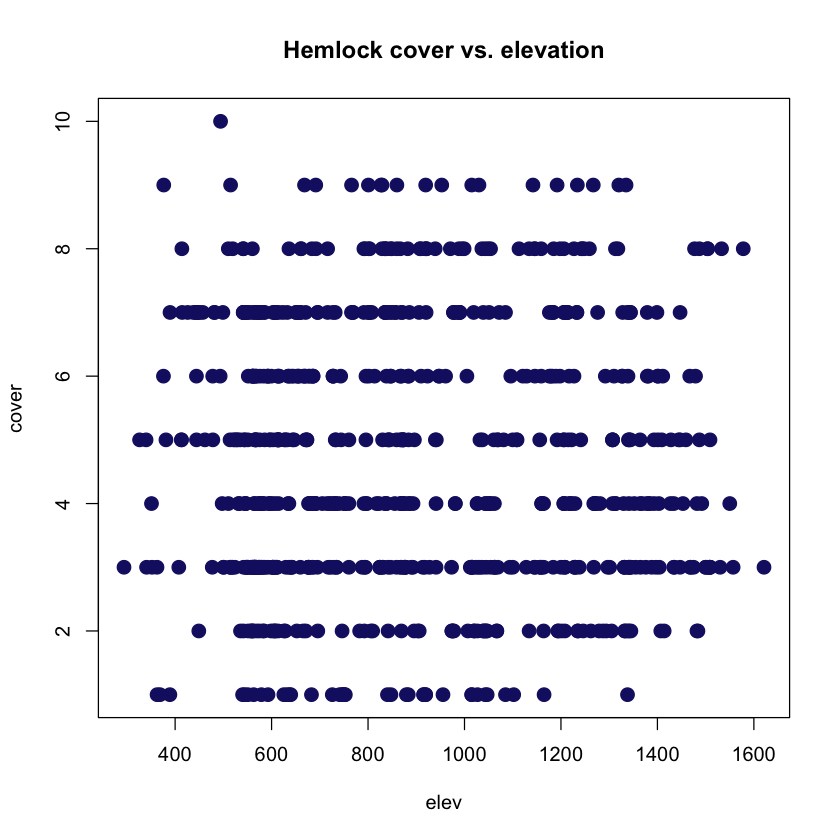

In [16]:
with(dat2,plot(elev,cover,main="Hemlock cover vs. elevation",      
               cex = 1.5, col = 'midnightblue', pch = 19))

In [17]:
#Note the chi-squared test is typically recommended for models with 'known deviance' (Poisson and binomial).  Here the model with elevation adds no explanatory power (fairly obvious from the graph), but we can still add the predicted trend line to our graph:

x = seq(0,1660)
#plot.new()
#lines(predict(glm2,list(elev=x),type="response"),lwd=2,col="orange")

#What is crucial here is the type argument to predict: "response" re-calculates the coefficients to be on the same scale as the original response variable, rather than the scale of the link function.  Let's now try an ANOVA with Poisson error, using disturbance as our predictor:

glm3 = glm(cover~disturb, data = dat2, family = poisson)

summary(glm3)
anova(glm1, glm3, test = "Chisq") 



Call:
glm(formula = cover ~ disturb, family = poisson, data = dat2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1794  -0.7763  -0.1980   0.8523   2.2006  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.48367    0.03838  38.661   <2e-16 ***
disturbLT-SEL  0.03204    0.04685   0.684    0.494    
disturbSETTLE  0.08957    0.05485   1.633    0.103    
disturbVIRGIN  0.12184    0.05277   2.309    0.021 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 749.25  on 745  degrees of freedom
Residual deviance: 742.32  on 742  degrees of freedom
AIC: 3211.3

Number of Fisher Scoring iterations: 4


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
745,749.2497,NA,NA,NA
742,742.3237,3,6.926019,0.07429355


In [18]:
glm2 = glm(cover~elev, data = dat2, family = poisson)
summary(glm2)
anova(glm1,glm2,test="Chisq") 


Call:
glm(formula = cover ~ elev, family = poisson, data = dat2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0673  -0.8250  -0.3048   0.9991   2.1347  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.546e+00  5.135e-02  30.115   <2e-16 ***
elev        -8.448e-06  5.471e-05  -0.154    0.877    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 749.25  on 745  degrees of freedom
Residual deviance: 749.23  on 744  degrees of freedom
AIC: 3214.2

Number of Fisher Scoring iterations: 4


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
745,749.2497,NA,NA,NA
744,749.2259,1,0.02384893,0.8772699


In [19]:
glm4 = glm(cover~disturb*elev,data=dat2,family=poisson)

summary(glm4) 


Call:
glm(formula = cover ~ disturb * elev, family = poisson, data = dat2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4042  -0.7782  -0.2072   0.8090   2.0888  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.445e+00  1.396e-01  10.352   <2e-16 ***
disturbLT-SEL       2.546e-01  1.639e-01   1.554   0.1203    
disturbSETTLE      -3.702e-01  2.275e-01  -1.628   0.1036    
disturbVIRGIN       9.283e-02  2.625e-01   0.354   0.7236    
elev                3.540e-05  1.243e-04   0.285   0.7758    
disturbLT-SEL:elev -2.788e-04  1.651e-04  -1.689   0.0912 .  
disturbSETTLE:elev  7.319e-04  2.943e-04   2.487   0.0129 *  
disturbVIRGIN:elev  2.278e-05  2.269e-04   0.100   0.9200    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 749.25  on 745  degrees of freedom
Residual deviance: 729.06  on 738  degrees of freedom
AIC:

In [20]:
step(glm4) 

Start:  AIC=3206
cover ~ disturb * elev

               Df Deviance  AIC
<none>              729.06 3206
- disturb:elev  3   742.06 3213



Call:  glm(formula = cover ~ disturb * elev, family = poisson, data = dat2)

Coefficients:
       (Intercept)       disturbLT-SEL       disturbSETTLE       disturbVIRGIN  
         1.445e+00           2.546e-01          -3.702e-01           9.283e-02  
              elev  disturbLT-SEL:elev  disturbSETTLE:elev  disturbVIRGIN:elev  
         3.540e-05          -2.788e-04           7.319e-04           2.278e-05  

Degrees of Freedom: 745 Total (i.e. Null);  738 Residual
Null Deviance:	    749.2 
Residual Deviance: 729.1 	AIC: 3206

The ANOVA contrasts suggest a significant difference in slope with elevation in the plots of prior settlement:
disturbSETTLE:elev  0.0129 *; 
the step function shows that the interaction is necessary (large increase in AIC when the interaction is removed).

In [1]:
#?step



In [2]:
#st=step(glm4) 

In [3]:
#st$anova